# Linear Regression of Boston Housing Prices

 <boldquote>The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.<boldqoute>

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per 10,000 USD
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in 1000USD

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import ShuffleSplit


# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
price = data['medv']
data = data.drop('Unnamed: 0', axis=1)
features = data.drop('medv', axis = 1)

    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

data.head()

Boston housing dataset has 506 data points with 14 variables each.


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#To check missing values 
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

<boldquote>No misssing values<boldquote>

## Exploratory Data Analysis

In [5]:
#To find minimum price 
minimum_price = np.min(price)

#To find maximum price 
maximum_price = np.max(price)

#To find mean price 
mean_price = np.mean(price)

#To find median price 
median_price = np.median(price)

#To find standard deviation of price
std_price = np.std(price)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price*1000))
print ("Maximum price: ${:,.2f}".format(maximum_price*1000))
print ("Mean price: ${:,.2f}".format(mean_price*1000))
print ("Median price ${:,.2f}".format(median_price*1000))
print ("Standard deviation of prices: ${:,.2f}".format(std_price*1000))

Statistics for Boston housing dataset:

Minimum price: $5,000.00
Maximum price: $50,000.00
Mean price: $22,532.81
Median price $21,200.00
Standard deviation of prices: $9,188.01


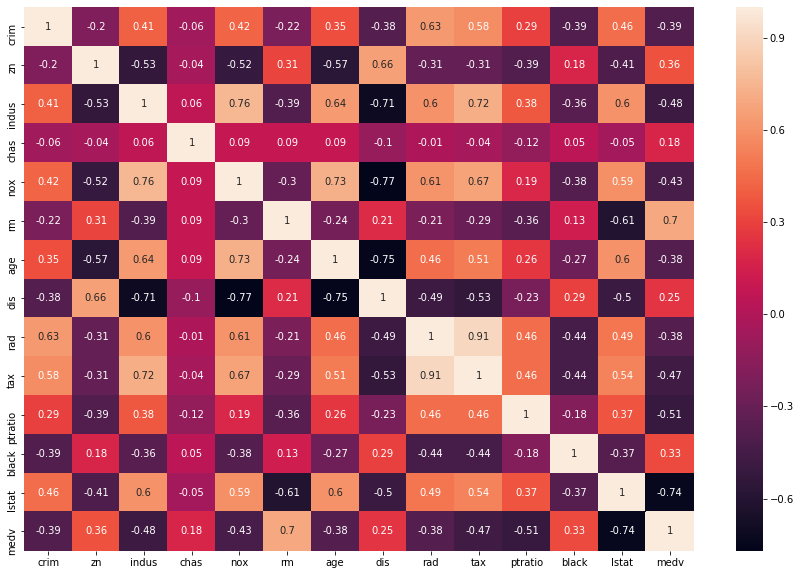

In [6]:
correlation_matrix = data.corr().round(2)
plt.pyplot.subplots(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True)

<boldquote>The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables.When it is close to -1, the variables have a strong negative correlation.<boldquote>


### Observations:

- To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).
- An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.

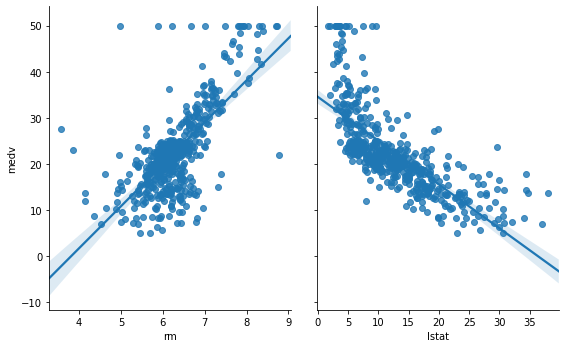

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data, x_vars=['rm','lstat'], y_vars=['medv'],
             height=5, aspect=.8, kind="reg");

### Preparing the data for training the model

In [8]:
X = pd.DataFrame(np.c_[data['lstat'], data['rm']], columns = ['lstat','rm'])
Y = price

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


### Training and testing the model

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Evaluation


In [11]:
# model evaluation for training set
from sklearn.metrics import r2_score
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print('RMSE : {}'.format(rmse))
print('R2 score :{}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print('RMSE : {}'.format(rmse))
print('R2 score : {}'.format(r2))

The model performance for training set
RMSE : 5.469313146224185
R2 score :0.6352394784952111


The model performance for testing set
RMSE : 5.766369317319991
R2 score : 0.6420358191045994
